# 1. get to the dataset directory

In [1]:
# cd new_adult_income_data/

In [2]:
# cd folktables/

In [11]:
!ls

machine-unlearning  try.py


# 2. Download the new adult income dataset

In [6]:
from folktables import ACSDataSource, ACSEmployment, ACSIncome
# from . import folktables
from pandas import read_csv
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'folktables'

In [5]:
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["CA"], download=True)
features, label, group = ACSIncome.df_to_numpy(acs_data)

NameError: name 'ACSDataSource' is not defined

In [14]:
# features.shape

In [15]:
df = pd.read_csv('./raw_datasets/new_adult_income.csv')

In [26]:
df.head()

,Unnamed: 0,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0,0
1,1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0,0
2,2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0,0
3,3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0,0
4,4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0,0


In [30]:
# df.drop('Unnamed: 0',  axis='columns', inplace=True)
df

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0,0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0,0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0,0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0,0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
195660,38.0,1.0,22.0,1.0,1021.0,210.0,0.0,40.0,1.0,6.0,1
195661,39.0,1.0,22.0,1.0,1021.0,210.0,1.0,40.0,2.0,6.0,1
195662,61.0,1.0,19.0,1.0,5240.0,17.0,0.0,45.0,1.0,1.0,1
195663,69.0,7.0,24.0,1.0,2040.0,207.0,0.0,45.0,1.0,6.0,0


In [236]:
column_names = ['age', 'workclass', 'education','marital-status', 'occupation', 'native-country', 'relationship', 'hours-per-week','gender','race']

In [237]:
df = pd.DataFrame(features, columns = column_names)

In [238]:
df

,age,workclass,education,marital-status,occupation,native-country,relationship,hours-per-week,gender,race
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
195660,38.0,1.0,22.0,1.0,1021.0,210.0,0.0,40.0,1.0,6.0
195661,39.0,1.0,22.0,1.0,1021.0,210.0,1.0,40.0,2.0,6.0
195662,61.0,1.0,19.0,1.0,5240.0,17.0,0.0,45.0,1.0,1.0
195663,69.0,7.0,24.0,1.0,2040.0,207.0,0.0,45.0,1.0,6.0


In [239]:
df['income'] = label

In [240]:
df['income'] = df['income'].map(lambda item : 0 if item ==False  else 1)
# df = df.replace({'PINCP': {False: 0,  True: 1}})

In [241]:
df.head()

,age,workclass,education,marital-status,occupation,native-country,relationship,hours-per-week,gender,race,income
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0,0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0,0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0,0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0,0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0,0


In [ ]:
df[]

In [242]:
df.to_csv("../../training_without_unlearning/raw_datasets/new_adult_income.csv")

In [250]:
adult = df

# Data Visualization

In [251]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics



def printmd(string):
    display(Markdown(string))
    

In [252]:
target = label
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=False, Count=115330, Percentage=58.943%
Class=True, Count=80335, Percentage=41.057%


In [253]:
printmd('## 2.1. gender vs Income')

## 2.1. gender vs Income

We plot a bar graph showing the proportion of income classes across the genders in figure         below. From the graph, at an overall view, there exists a wage gap between females and males.         Since we do not have the exactly value of the income, we are limited to only observing that the         proportion of males earning more than 50k a year is more than double of their female counterparts.         

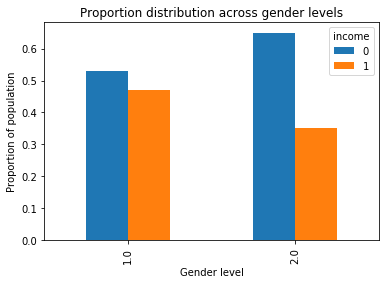

In [254]:
gender = round(pd.crosstab(adult.gender, adult.income).div(pd.crosstab(adult.gender, adult.income).apply(sum,1),0),2)
# gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

printmd('We plot a bar graph showing the proportion of income classes across the genders in figure \
        below. From the graph, at an overall view, there exists a wage gap between females and males. \
        Since we do not have the exactly value of the income, we are limited to only observing that the \
        proportion of males earning more than 50k a year is more than double of their female counterparts. \
        ')

## 2.2. Education vs Income

I plot a bar graph showing the proportion of income classes across education levels         in the figure below. As one would expect, we see from the bar graph below that as the         education level increase, the proportion of people who earn more than 50k a year also         increase. It is interesting to note that only after a master's degree, the proportion of         people earning more than 50k a year, is a majority.

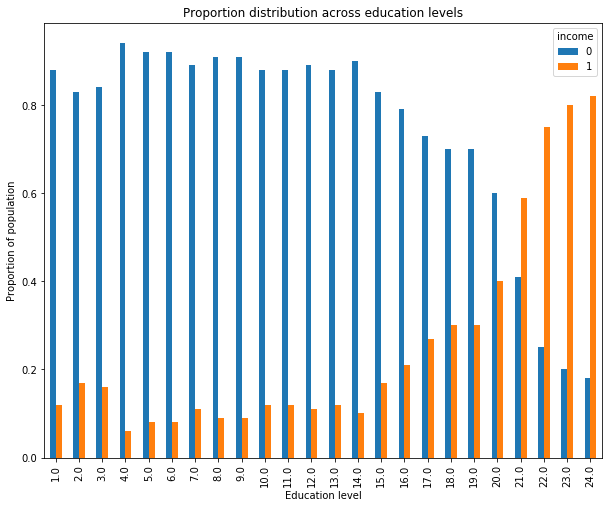

In [263]:
printmd('## 2.2. Education vs Income')

education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
# education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

printmd('I plot a bar graph showing the proportion of income classes across education levels \
        in the figure below. As one would expect, we see from the bar graph below that as the \
        education level increase, the proportion of people who earn more than 50k a year also \
        increase. It is interesting to note that only after a master\'s degree, the proportion of \
        people earning more than 50k a year, is a majority.')
        

Taking a closer look at the disparity in income between men and women, plot the         proportion of men and women who earn more than 50k a year, across all the working         classes as seen in Fig. 3. We see that men always have a higher proportion earning         more than 50k a year than women, except for the 'without.pay' working class, where         they have the same proportion.

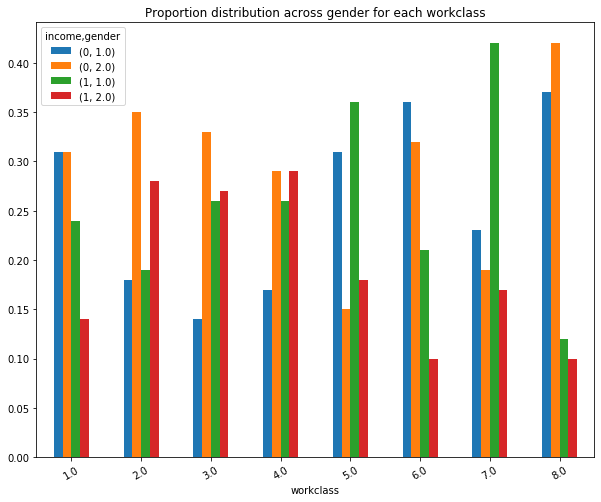

In [267]:
gender_workclass = round(pd.crosstab(adult.workclass, [adult.income, adult.gender]).div(pd.crosstab(adult.workclass, [adult.income, adult.gender]).apply(sum,1),0),2)
gender_workclass.plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

printmd('Taking a closer look at the disparity in income between men and women, plot the \
        proportion of men and women who earn more than 50k a year, across all the working \
        classes as seen in Fig. 3. We see that men always have a higher proportion earning \
        more than 50k a year than women, except for the \'without.pay\' working class, where \
        they have the same proportion.')

The class distribution is then summarized, confirming a modest class balance with approximately 59 percent for the majority class (<=50K) and approximately 41 percent for the minority class (>50K).

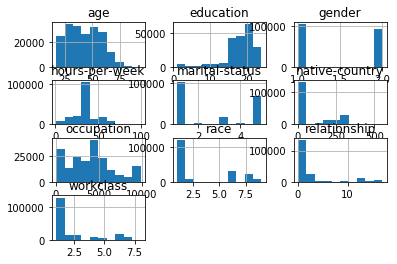

In [200]:
# create histograms of numeric input variables
from pandas import read_csv
from matplotlib import pyplot
# select columns with numerical data types
num_ix = df.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = df[num_ix]
# create a histogram plot of each numeric variable
subset.hist()
pyplot.show()

We are plotting a Bar graph using the pandas .plot() function to visualize the relationship between education and income attributes. We achieve it by grouping the values of education using pandas .groupby() function against the mean of income attribute using .mean(). In the same way, we can plot the Bar graphs for all the other independent attributes against income as we see below.

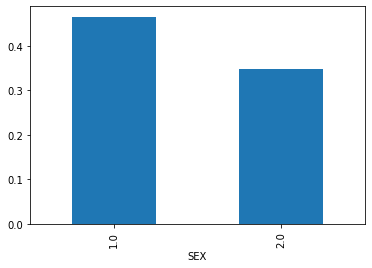

In [166]:
df.groupby('SEX').PINCP.mean().plot(kind='bar')

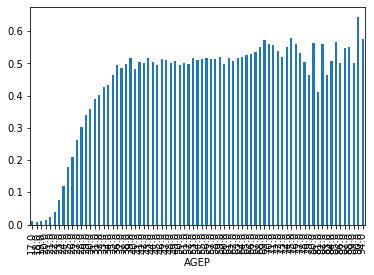

In [167]:
df.groupby('AGEP').PINCP.mean().plot(kind='bar')

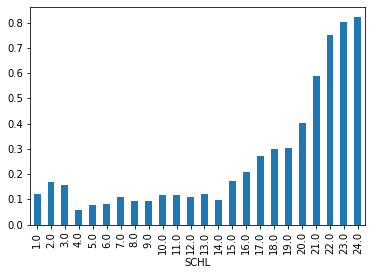

In [168]:
df.groupby('SCHL').PINCP.mean().plot(kind='bar')

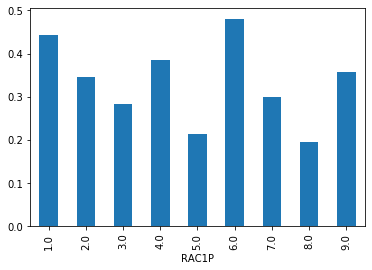

In [169]:
df.groupby('RAC1P').PINCP.mean().plot(kind='bar')

In [269]:
!pip3 install mlxtend

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
ERROR: Could not install packages due to an EnvironmentError: [Errno 30] Read-only file system: '/cvmfs/ai.mila.quebec/apps/x86_64/debian/anaconda/3/lib/python3.7/site-packages/mlxtend-0.19.0.dist-info'

You should consider upgrading via the '/cvmfs/ai.mila.quebec/apps/x86_64/debian/anaconda/3/bin/python -m pip install --upgrade pip' command.


In [121]:
df = pd.read_csv('./raw_datasets/new_adult_income.csv')

In [122]:
df.drop('Unnamed: 0',  axis='columns', inplace=True)
df

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0,0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0,0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0,0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0,0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
195660,38.0,1.0,22.0,1.0,1021.0,210.0,0.0,40.0,1.0,6.0,1
195661,39.0,1.0,22.0,1.0,1021.0,210.0,1.0,40.0,2.0,6.0,1
195662,61.0,1.0,19.0,1.0,5240.0,17.0,0.0,45.0,1.0,1.0,1
195663,69.0,7.0,24.0,1.0,2040.0,207.0,0.0,45.0,1.0,6.0,0


In [123]:
column_names = ['age', 'workclass', 'education','marital-status', 'occupation', 'native-country', 'relationship', 'hours-per-week','gender','race','income']

In [124]:
df.columns = column_names

In [125]:
df.head()

,age,workclass,education,marital-status,occupation,native-country,relationship,hours-per-week,gender,race,income
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0,0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0,0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0,0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0,0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0,0


In [126]:
gender = df['gender']
gender

0         1.0
1         1.0
2         1.0
3         1.0
4         2.0
         ... 
195660    1.0
195661    2.0
195662    1.0
195663    1.0
195664    1.0
Name: gender, Length: 195665, dtype: float64

In [127]:
df['male'] = gender
df['female'] = gender

In [128]:
df = df.replace({'male': {2.0: 0, 1.0: 1}})
df = df.replace({'female': {2.0: 1, 1.0: 0}})
# df.drop('gender')

In [129]:
df.

,age,workclass,education,marital-status,occupation,native-country,relationship,hours-per-week,gender,race,income,male,female
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0,0,1.0,0.0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0,0,1.0,0.0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0,0,1.0,0.0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0,0,1.0,0.0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195660,38.0,1.0,22.0,1.0,1021.0,210.0,0.0,40.0,1.0,6.0,1,1.0,0.0
195661,39.0,1.0,22.0,1.0,1021.0,210.0,1.0,40.0,2.0,6.0,1,0.0,1.0
195662,61.0,1.0,19.0,1.0,5240.0,17.0,0.0,45.0,1.0,1.0,1,1.0,0.0
195663,69.0,7.0,24.0,1.0,2040.0,207.0,0.0,45.0,1.0,6.0,0,1.0,0.0


In [95]:
for i in range(df['gender'].shape[0]):
    if i in male_index[0]:
        print(i)
        df['male'] = '1'
        df['female'] = '0'
    else:
        df['male'] = '0' 
        df['female'] = '1'

0
1
2
3
6
8
9
11
12
16
19
21
22
24
25
26
28
29
30
31
32
34
35
37
38
39
41
45
46
47
48
50
51
52
53
54
55
57
59
60
61
62
63
64
65
66
70
71
72
74
75
78
82
84
86
87
88
91
94
95
96
98
99
101
104
105
106
108
109
113
114
115
116
117
118
119
120
122
123
125
127
129
130
132
134
135
136
137
138
139
141
145
146
147
149
151
152
156
157
158
159
160
161
163
164
165
169
175
177
178
179
180
181
183
184
186
188
190
192
193
194
197
200
201
202
203
205
206
208
210
213
216
218
219
221
222
223
224
226
227
228
229
231
233
235
237
238
239
241
242
243
244
247
248
250
251
252
254
255
256
261
263
265
266
267
270
272
274
275
276
277
278
279
280
281
282
283
284
287
288
290
292
294
297
299
301
302
303
304
306
307
308
309
310
311
312
313
314
316
318
320
321
323
324
326
329
330
331
333
334
336
337
338
340
341
342
343
344
345
348
349
351
352
353
354
355
357
359
362
364
365
368
369
370
372
373
374
375
376
377
379
380
382
388
389
390
393
394
397
398
400
401
402
403
404
406
409
412
413
414
416
417
418
425
426
427
430
43

KeyboardInterrupt: 

In [97]:
df['female']

0         1
1         1
2         1
3         1
4         1
         ..
195660    1
195661    1
195662    1
195663    1
195664    1
Name: female, Length: 195665, dtype: object